In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
insurance = pd.read_csv("data/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [16]:
male_smokers = insurance[
    (insurance["sex"] == "male") & (insurance["smoker"] == "yes")
].sort_values(by=["bmi"])
X = male_smokers["bmi"].to_numpy().reshape(-1, 1)
y = male_smokers["expenses"].to_numpy().reshape(-1, 1)

X_one = np.c_[np.ones((X.shape[0], 1)), X]
X_one[:3]

array([[ 1. , 17.3],
       [ 1. , 19.3],
       [ 1. , 19.8]])

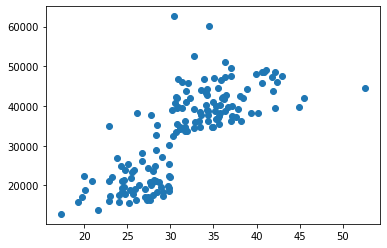

In [17]:
plt.scatter(X, y)

In [23]:
hat_alpha = np.linalg.inv(X_one.T @ X_one) @ X_one.T @ y

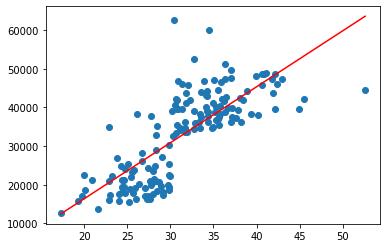

In [25]:
y_reg = X * hat_alpha[1] + hat_alpha[0]

fig, ax = plt.subplots()
ax.scatter(X, y)
line = plt.plot(X, y_reg, "r")
plt.show()